In [1]:
import os
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from image_similarity_measures.quality_metrics import fsim, uiq, issm
from skimage.metrics import structural_similarity as skiSSIM
from skimage.metrics import normalized_root_mse as skiNRMSE

DATA_DIR = "/home/bbejczy/repos/multitask-mayhem/data/interim/2022-09-23-11-03-28"

# %matplotlib inline

In [2]:
# find images
rgb_path_list = []
for root, dirs, files in os.walk(DATA_DIR):
    for name in files:
        if name.endswith((".png")) & ("depth" not in str(root)):
            rgb_path_list.append(os.path.join(root, name))
rgb_path_list.sort()

In [3]:
def hist_calc(im1, im2):
    him1 = cv2.calcHist(im1, [0], None, [256], [0, 256])
    him2 = cv2.calcHist(im2, [0], None, [256], [0, 256])
    return cv2.compareHist(him1, him1, method=0)

def similarity_check(im1, im2, name1, name2):
    ssim_res = skiSSIM(im1, im2, win_size=111) # higher the more similar TODO: find correct window size
    nrmse_res = skiNRMSE(im1, im2) # lower the more similar
    # fsim_res = fsim(im1, im2) # higher the more similar
    fsim_res = 0
    hist = hist_calc(im1, im2)
    
    similarity_index = (ssim_res * 0.4 + (1-nrmse_res) * 0.6)#+ fsim_res * 0.25)

    # setup the figure
    fig = plt.figure()
    plt.suptitle(
         "SSIM: %.2f, inverse RMSE: %.2f, FSIM: %.2f\nIndex %.3f\n\nim1: %s\nim2: %s"
        % (ssim_res, (1-nrmse_res), fsim_res, similarity_index, Path(name1).stem, Path(name2).stem)
    )
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(im1, cmap=plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(im2, cmap=plt.cm.gray)
    plt.axis("off")
    # show the images
    plt.show()
    return similarity_index


def compare_images(images_list, limit):
    count, count_lim = 0, 0
    first_image = images_list[0]
    for current_image in images_list[1:]:
        im1 = cv2.imread(first_image, cv2.IMREAD_GRAYSCALE)
        im2 = cv2.imread(current_image, cv2.IMREAD_GRAYSCALE)
        if not np.array_equal(im1, im2):
            count = count + 1
            similarity_result = similarity_check(im1, im2, first_image, current_image)
            if similarity_result < limit:
                count_lim = count_lim + 1
                first_image = current_image
    print(
        "All: {} | Non-dupicate: {} | Under-limit: {}".format(
            len(images_list), count, count_lim
        )
    )

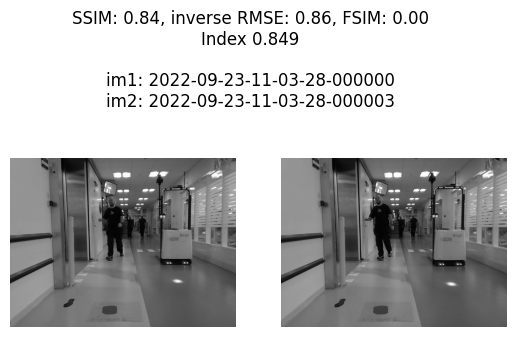

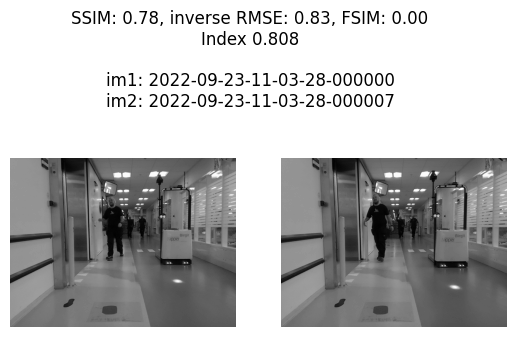

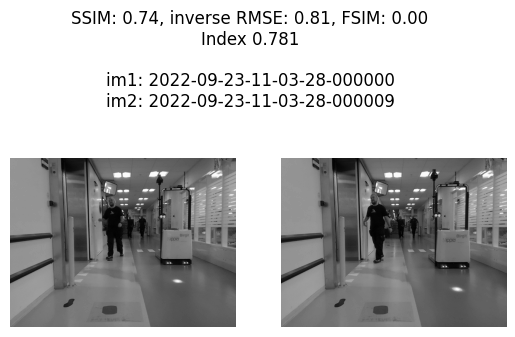

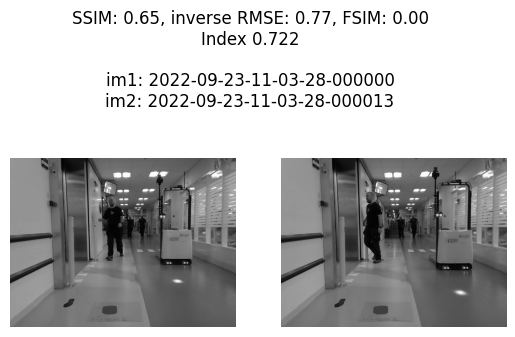

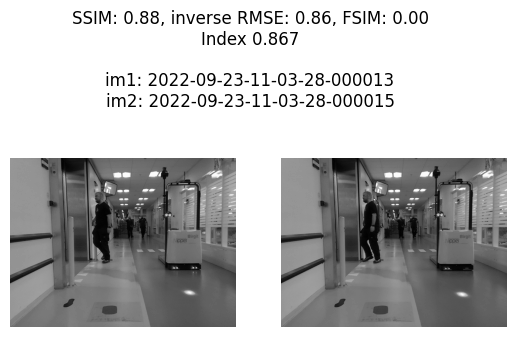

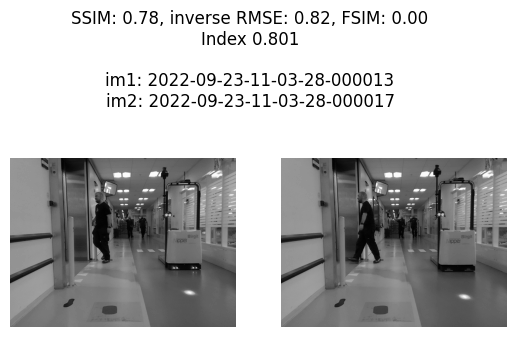

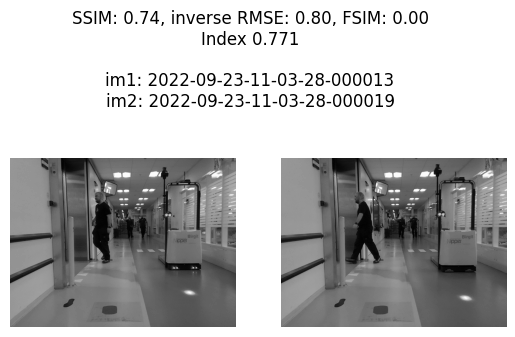

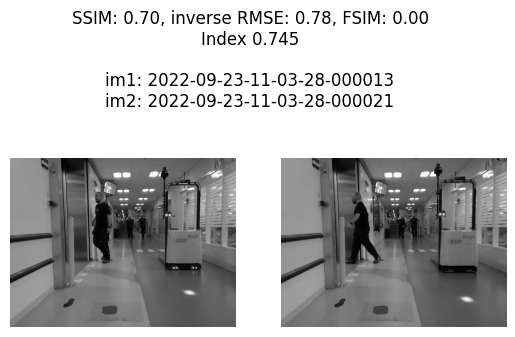

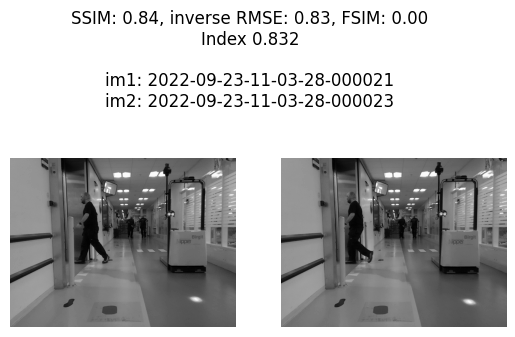

All: 10 | Non-dupicate: 9 | Under-limit: 2


In [4]:
# moving object
compare_images(rgb_path_list[0:10], 0.75)

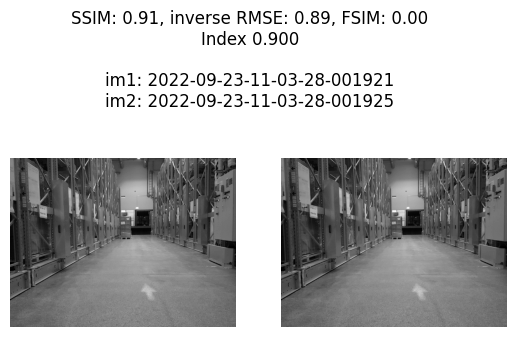

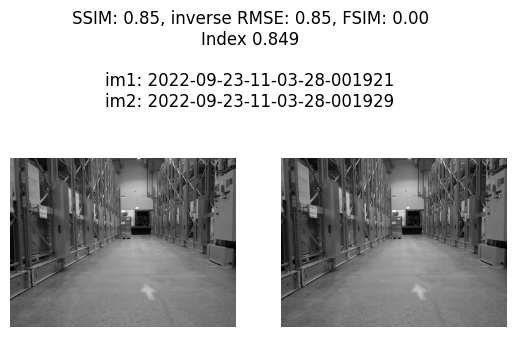

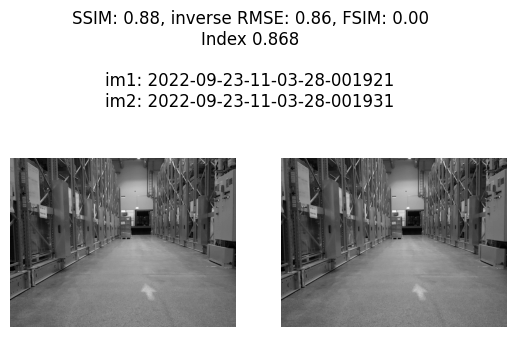

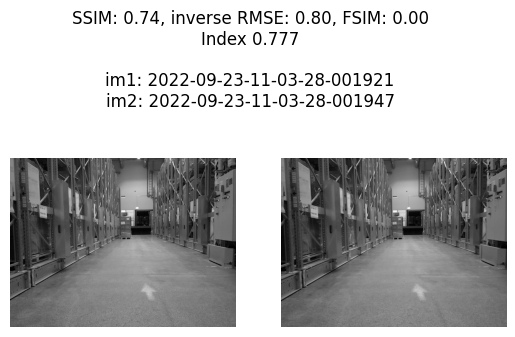

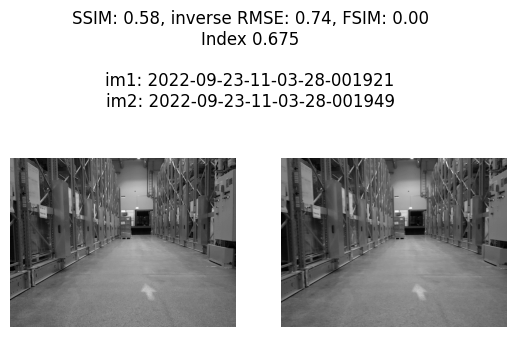

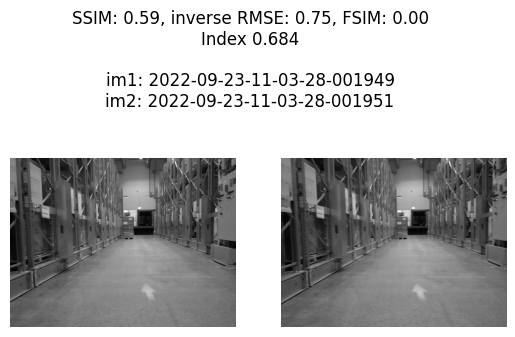

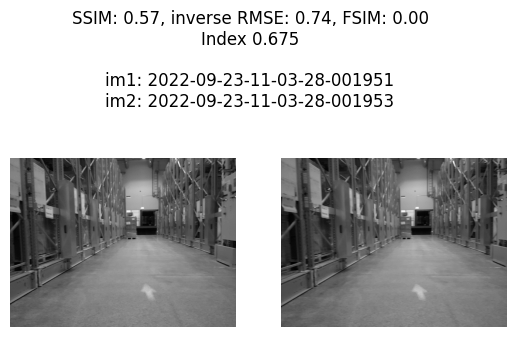

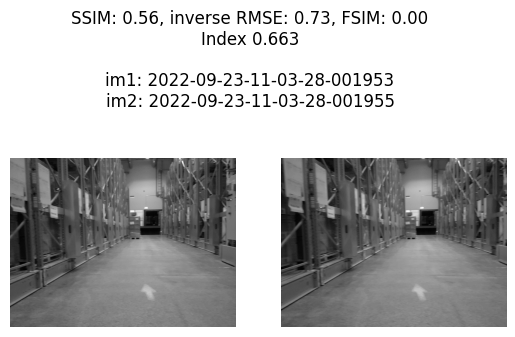

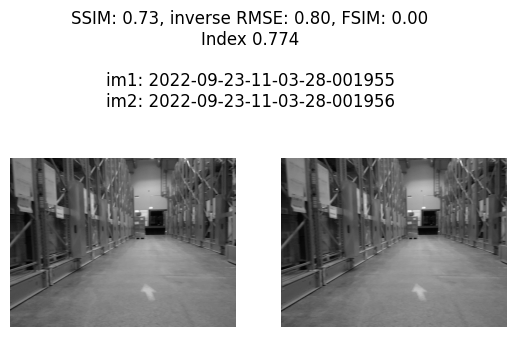

All: 10 | Non-dupicate: 9 | Under-limit: 4


In [5]:
# moving scene
compare_images(rgb_path_list[600:610], 0.75)

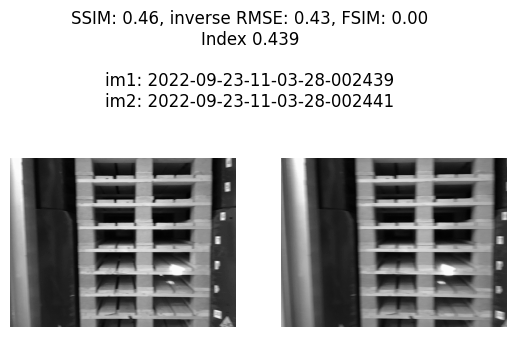

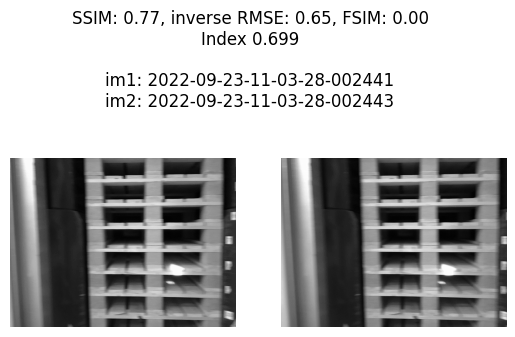

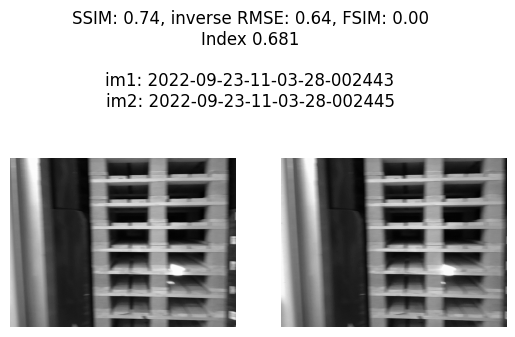

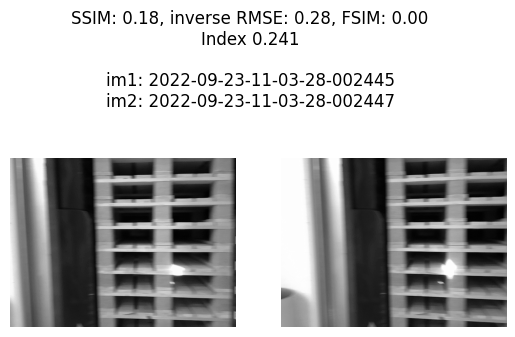

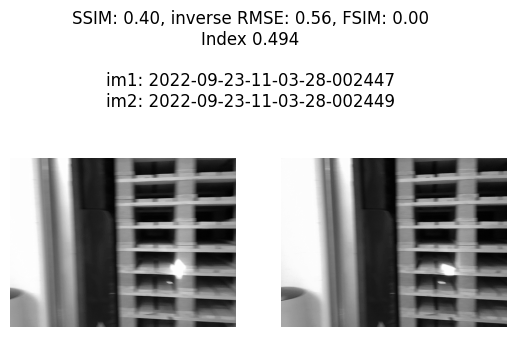

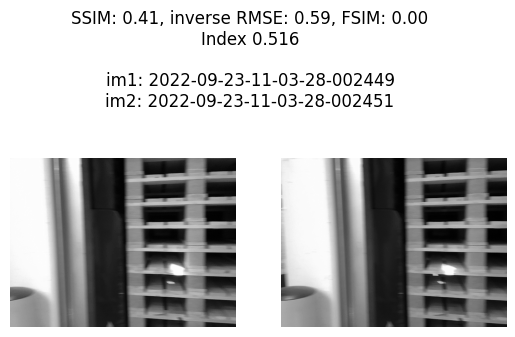

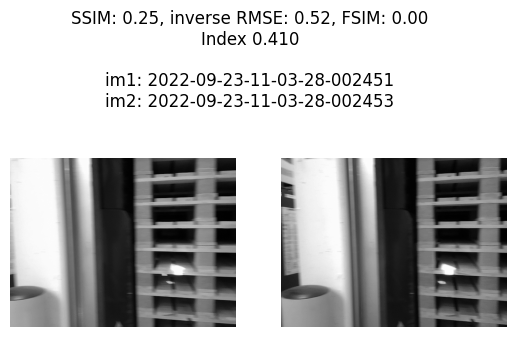

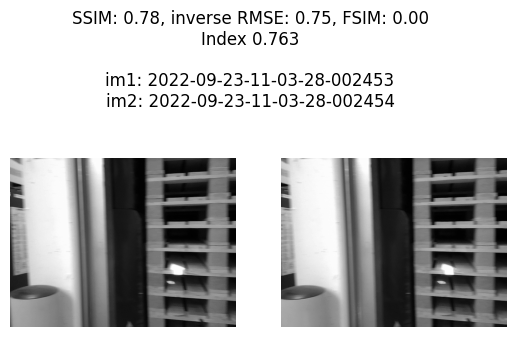

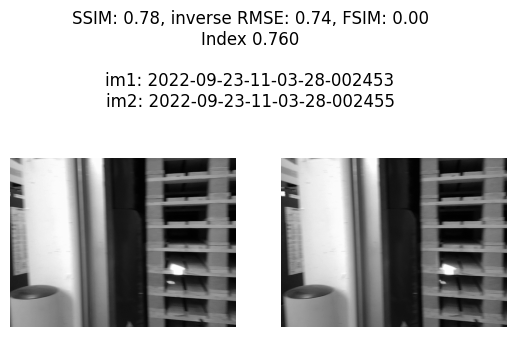

All: 10 | Non-dupicate: 9 | Under-limit: 7


In [6]:
# moving scene
compare_images(rgb_path_list[800:810], 0.75)